# Potential Talents

## Introduction

A talent sourcing and management comany are interested in finding talented individuals for sourcing these candidates to technology companies. Finding talented candidates is not easy, for several reasons. The first reason is one needs to understand what the role is very well to fill in that spot, this required understanding the client's needs and what they are looking for in a potential candidate. The second reason is one needs to understand what makes a candidate shine for the role we are in search for. Third reason is where to find talented individuals is another challenge.

The nature of the job requires a lot of human labor and is full of manual operations. Toward automating this process, they want to build a better approach that can save them time and help spot potential candidates that could fit the roles they are in search for. Moreover, going beyond that for a specific role, they are interested in developing a machine learning powered pipeline that could spot talented individuals, and rank them based on their fitness. 

The company right now semi-automatically sourcing a few candidates, therefore the sourcing part is not of concern at the time but they expect to first determine best matching candidates based on how fit these candidates are for a given role. They generally make these searches based on some keywords such as "full-stack software engineer", "engineering manager" or "aspiring human resource" based on the role they are trying to fill in. These keywords might change, and you can expect that specific keywords will be provided to you. 

Assuming that they are able to list and rank fitting candidates, thne they employ a review procedure, as each candidate needs to be reviewed and then determined how good a fit they are through manual inspection. This procedure is done manually, and at the end of this manual review, they might choose not the first fitting candidates in the list but maybe the 7th candidate in the list. Starring one candidate actually sets this candidate as an ideal candidate for the given role. Then, they expect the list to be re-ranked each time a candidate is starred.

## Data Description

The data comes from the sourcing efforts. They have removed any field that could directly reveal personal details and gave a unique identifier for each candidate. The data is in tabular format and it contains the following attributes:

* __id__: unique identifier for candidate (numerical)
* __job_title__: job title for candidate (text)
* __location__: geographical location of candidate (text)
* __connections__: number of connections candidate has, 500+ means over 500 (text)
* __fit__: how fit the candidate is for this role? (numeric, probability between 0-1)

Keywords given to us are:
- aspiring human resources
- seeking human resources

The data can be downloaded from:
* https://docs.google.com/spreadsheets/d/117X6i53dKiO7w6kuA1g1TpdTlv1173h_dPlJt5cNNMU/edit?usp=sharing

## Objective

* Predict how fit the candidate is based on their available information (variable fit)

## Exploratory Data Analysis

### Importing Libraries

In [216]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth',None)

### Loading The Dataset

In [217]:
# loading the dataset using pandas
df = pd.read_csv("potential-talents - Aspiring human resources - seeking human resources.csv")

### Structured Based Data Exploration

In [218]:
# display first 5 observations
df.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Program in Korea),Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [219]:
# display the last 5 observations
df.tail()

,id,job_title,location,connection,fit
99,100,Aspiring Human Resources Manager | Graduating May 2020 | Seeking an Entry-Level Human Resources Position in St. Louis,"Cape Girardeau, Missouri",103,NaN
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500+,NaN
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN
102,103,Always set them up for Success,Greater Los Angeles Area,500+,NaN
103,104,Director Of Administration at Excellence Logging,"Katy, Texas",500+,NaN


In [220]:
# display the number of variables and observations
print("The shape of the data is:",df.shape)

The shape of the data is: (104, 5)


In [221]:
# display the variable names and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ KB


In [222]:
# count of missing values
df.isnull().sum()

id              0
job_title       0
location        0
connection      0
fit           104
dtype: int64

In [223]:
# drop fit column
df = df.drop(columns='fit')

In [224]:
# check duplicates 
df.duplicated(keep=False).sum()

0

### Descriptive Statistics

In [225]:
# decription of the dataset
df.describe(include='all')

,id,job_title,location,connection
count,104.000000,104,104,104
unique,NaN,52,41,33
top,NaN,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,Kanada,500+
freq,NaN,7,12,44
mean,52.500000,NaN,NaN,NaN
std,30.166206,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,26.750000,NaN,NaN,NaN
50%,52.500000,NaN,NaN,NaN
75%,78.250000,NaN,NaN,NaN


From the above ezploration, the dataset provided consists of 5 columns and 104 observations. It includes the following:
* __id__: a unique identifier that is of int64 type with no missing or duplicated values.
* __job_title__: job title of candidates that is of object type with no missing or duplicated values. It has 52 unique values and "2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional" is the most frequent as it occurred 7 times.
* __location__: location of candidates that is of object type with no missing or duplicated values. It has 41 unique values and "Kanada" is the most frequent as it occurred 12 times. 
* __connections__: number of connections cadidate has and it is of type object with no missing or duplicated values. It has 33 unique values and "500+" is the most frequent value as it occurred 44 times. 

In [226]:
# value counts of job_title column
df['job_title'].value_counts()

2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional                 7
Aspiring Human Resources Professional                                                                                    7
Student at Humber College and Aspiring Human Resources Generalist                                                        7
People Development Coordinator at Ryan                                                                                   6
Native English Teacher at EPIK (English Program in Korea)                                                                5
Aspiring Human Resources Specialist                                                                                      5
HR Senior Specialist                                                                                                     5
Student at Chapman University                                                                                            4
SVP, CHRO, Marke

## Text Preprocessing

### Text Cleaning

In [227]:
# create cleaned job_title column
df['job_title_cleaned'] = df['job_title'].str.replace('HR', 'Human Resources')

# view first 5 observations
df.head()

,id,job_title,location,connection,job_title_cleaned
0,1,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"Houston, Texas",85,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional
1,2,Native English Teacher at EPIK (English Program in Korea),Kanada,500+,Native English Teacher at EPIK (English Program in Korea)
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,Aspiring Human Resources Professional
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,People Development Coordinator at Ryan
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,Advisory Board Member at Celal Bayar University


In [228]:
# removal of punctuations in job_title_cleaned
df['job_title_cleaned'] = df['job_title_cleaned'].str.replace("[^a-zA-Z\s]",'', regex=True)

# making it all in lowercase
df['job_title_cleaned'] = df['job_title_cleaned'].str.lower()

# view first 5 observations
df.head()

,id,job_title,location,connection,job_title_cleaned
0,1,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"Houston, Texas",85,ct bauer college of business graduate magna cum laude and aspiring human resources professional
1,2,Native English Teacher at EPIK (English Program in Korea),Kanada,500+,native english teacher at epik english program in korea
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resources professional
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,people development coordinator at ryan
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,advisory board member at celal bayar university


In [229]:
# importing stopwords from nltk, wordnet lemmatizer, word tokenizer, TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, TreebankWordDetokenizer

# instance of lemmatizer
lemmatizer = WordNetLemmatizer()

# loop to remove stopwords and lemmatize
for i in range(len(df)):
    tokenized_words = word_tokenize(df['job_title_cleaned'][i])
    removed_stopwords = [word for word in tokenized_words if word not in set(stopwords.words('english'))]
    lemmatized_sentence = []
    for word in removed_stopwords:
        lemmatized_sentence.append(lemmatizer.lemmatize(word))
    df['job_title_cleaned'][i] = TreebankWordDetokenizer().detokenize(lemmatized_sentence)

/var/folders/vp/hynh_sb9743bb2xl58zv5jw80000gn/T/ipykernel_17679/2106669357.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_title_cleaned'][i] = TreebankWordDetokenizer().detokenize(lemmatized_sentence)


In [230]:
# first 5 observations
df.head()

,id,job_title,location,connection,job_title_cleaned
0,1,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"Houston, Texas",85,ct bauer college business graduate magna cum laude aspiring human resource professional
1,2,Native English Teacher at EPIK (English Program in Korea),Kanada,500+,native english teacher epik english program korea
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,people development coordinator ryan
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,advisory board member celal bayar university


## Vectorization Using TF-IDF

In [231]:
# importing tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

# initiate a vectorizer instance
tfidf = TfidfVectorizer()

In [232]:
# list of job_title_cleaned column
job_title_cleaned_list = list(df['job_title_cleaned'])

# vectorize list
X =tfidf.fit_transform(job_title_cleaned_list)

# print 5 observations in X
print(X[:5])

  (0, 127)	0.24414913835566904
  (0, 135)	0.13120404684651818
  (0, 70)	0.13664908178354393
  (0, 10)	0.19723475625735126
  (0, 87)	0.34051644347089016
  (0, 37)	0.34051644347089016
  (0, 97)	0.34051644347089016
  (0, 62)	0.34051644347089016
  (0, 22)	0.3018909545695373
  (0, 28)	0.2806338140848468
  (0, 14)	0.34051644347089016
  (0, 36)	0.34051644347089016
  (1, 85)	0.33333333333333337
  (1, 128)	0.33333333333333337
  (1, 54)	0.33333333333333337
  (1, 161)	0.33333333333333337
  (1, 50)	0.6666666666666667
  (1, 108)	0.33333333333333337
  (2, 127)	0.6659767639630543
  (2, 135)	0.35789127549739824
  (2, 70)	0.3727439461701227
  (2, 10)	0.538006259608258
  (3, 141)	0.5149529932022894
  (3, 33)	0.4521838612511605
  (3, 41)	0.5149529932022894
  (3, 122)	0.5149529932022894
  (4, 167)	0.32322584041878183
  (4, 15)	0.42320799994460695
  (4, 24)	0.42320799994460695
  (4, 106)	0.42320799994460695
  (4, 19)	0.42320799994460695
  (4, 3)	0.42320799994460695


In [233]:
# feature names of all the X values
feature_names = tfidf.get_feature_names_out()

# some of the feature names
print(feature_names[5:15])
print()
# number of features
print("The number of features we have:",len(feature_names))

['america' 'analyst' 'analytics' 'army' 'art' 'aspiring' 'assistant'
 'atlanta' 'bachelor' 'bauer']

The number of features we have: 176


In [234]:
# convering X into an array
tfidf_vector = X.toarray()
print("The shape of TF-IDF vector is:",tfidf_vector.shape)

The shape of TF-IDF vector is: (104, 176)


## Cosine Similarity

After cleaning the text and creating the features of unique words in the data. I'd like to calculate the similarity between the phrases and the document .The phrases that were provided are the following:
* Aspiring human resources.
* seeking human resources.

In [235]:
# phrase
phrase1 = "Aspiring human resources"
phrase2 = "seeking human resources"

In [236]:
# import cosine similarity from scipy
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine

In [237]:
# lemmatize phrase1
lemmatized_phrase1 = []
tokenized_phrase1 = word_tokenize(phrase1.lower())
for word in tokenized_phrase1:
    lemmatized_phrase1.append(lemmatizer.lemmatize(word))
lemmatized_phrase1 = TreebankWordDetokenizer().detokenize(lemmatized_phrase1)

# convert search phrase into a vector
X1 = tfidf.transform([lemmatized_phrase1])
X1_vector = X1.toarray()
print('Shape of phrase1 vector:',X1_vector.shape)

Shape of phrase1 vector: (1, 176)


In [238]:
# consine similarity calculation for phrase1
similarity_score = []
for i in range(len(df)):
    similarity_score.append(cosine(X1_vector,tfidf_vector[i]))
    
# add the score to the dataset
df['similarity_tfidf1'] = similarity_score

# fixing the score to show the highest as the most similar 
df['similarity_tfidf1'] = df['similarity_tfidf1'].apply(lambda x: 1 - x)

# viewing dataset by highest score
sorted_df = df.sort_values(by='similarity_tfidf1', ascending=False)
sorted_df.head()

,id,job_title,location,connection,job_title_cleaned,similarity_tfidf1
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972
20,21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972
57,58,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972
96,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,aspiring human resource professional,0.745972
32,33,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972


## Word Embeddings

### Glove

In [239]:
# importing functions from gensim
from gensim.test.utils import get_tmpfile
from gensim.models import Word2Vec, KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# create temp file and save converted embedding
glove_file = get_tmpfile('word2vec.6B.50d.txt')
glove2word2vec('glove.6B.50d.txt', glove_file)

# load converted embedding into memory
glove_model = KeyedVectors.load_word2vec_format(glove_file)

# saving glove model
glove_model.save_word2vec_format('word2vec.6B.50d.bin.gz', binary=True)

/var/folders/vp/hynh_sb9743bb2xl58zv5jw80000gn/T/ipykernel_17679/102838903.py:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec('glove.6B.50d.txt', glove_file)


In [240]:
# define a function to vectorize words in sentence
def doc_token_vectors(sentence, model, sentence_vector_list, vector_dimensions):
    word_tokens = word_tokenize(sentence)
    filtered_words = [word for word in word_tokens if word in model.key_to_index.keys()]
    
    for i in range(len(word_tokens)):
        if word_tokens[i] in filtered_words:
            token_vector = model[word_tokens[i]]
        else:
            token_vector = np.zeros(vector_dimensions)
        sentence_vector_list.append(token_vector)
    
    return sentence_vector_list

In [241]:
# vectorize job title using glove model
glove_vectors = []
for i in range(len(df)):
    glove_sentence_vector = []
    doc_token_vectors(df['job_title_cleaned'][i], glove_model, glove_sentence_vector, 50)
    glove_vectors.append(glove_sentence_vector)

In [242]:
# vectorize keyword phrase using glove model
glove_search_phrase = []
doc_token_vectors(lemmatized_phrase1, glove_model, glove_search_phrase, 50)

[array([-4.3762e-01,  8.3236e-01,  2.9638e-01, -7.8180e-01,  2.4432e-01,
         3.2892e-01, -8.2750e-01,  1.2692e-01, -3.9246e-01,  8.6643e-01,
         2.4300e-01, -6.6664e-04,  5.2488e-01,  1.5963e+00,  3.8362e-01,
        -3.2021e-01,  1.0324e+00,  7.0235e-01,  4.1679e-01, -2.0262e-01,
         2.8378e-01,  9.4354e-01, -3.4941e-01,  1.4981e+00,  3.2488e-01,
        -6.6963e-01, -4.2229e-01, -1.3033e+00, -5.9413e-01, -7.0466e-02,
         7.0193e-01,  3.0914e-01, -4.0663e-01, -6.4972e-01,  7.7279e-01,
         3.3412e-01, -8.0891e-01,  2.4861e-02, -5.1049e-01, -8.1757e-01,
        -1.0251e-01,  5.6904e-01,  6.7411e-01, -1.9030e-01,  4.0583e-01,
        -6.1531e-01,  2.2660e-01, -1.1493e-03, -6.5260e-01,  1.8631e-01],
       dtype=float32),
 array([ 0.61854 ,  0.11915 , -0.46786 ,  0.31368 ,  1.0334  ,  0.95964 ,
         0.87803 , -1.0346  ,  1.6322  ,  0.29347 ,  0.80844 , -0.058903,
         0.021251,  0.40986 ,  0.54443 , -0.33311 ,  0.53712 , -0.35823 ,
         0.29374 ,  0.09

In [243]:
# calculate cosine similarity between keyword and job title
glove_similarity = []
for i in range(len(df)):
    similarity = cosine(np.mean(glove_vectors[i], axis=0), np.mean(glove_search_phrase, axis=0))
    glove_similarity.append(similarity)
    
# add glove similarity score to the data
df['glove_similarity'] = glove_similarity

# fixing the score to show the highest as the most similar
df['glove_similarity'] = df['glove_similarity'].apply(lambda x: 1 - x)

# viewing dataset by highest glove similarity scores
df_sorted3 = df.sort_values(by='glove_similarity', ascending=False)
df_sorted3.head()

,id,job_title,location,connection,job_title_cleaned,similarity_tfidf1,glove_similarity
59,60,Aspiring Human Resources Specialist,Greater New York City Area,1,aspiring human resource specialist,0.680757,0.969614
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,aspiring human resource specialist,0.680757,0.969614
23,24,Aspiring Human Resources Specialist,Greater New York City Area,1,aspiring human resource specialist,0.680757,0.969614
48,49,Aspiring Human Resources Specialist,Greater New York City Area,1,aspiring human resource specialist,0.680757,0.969614
35,36,Aspiring Human Resources Specialist,Greater New York City Area,1,aspiring human resource specialist,0.680757,0.969614


### Word2Vec

In [244]:
# downloading the google news word2vec model
w2v_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [245]:
# vectorize job title using w2v_model
w2v_vectors = []
for i in range(len(df)):
    w2v_sentence_vector = []
    doc_token_vectors(df['job_title_cleaned'][i], w2v_model, w2v_sentence_vector, 300)
    w2v_vectors.append(w2v_sentence_vector)

In [246]:
# vectorize keyword using w2v_model
w2v_search_phrase = []
doc_token_vectors(lemmatized_phrase1, w2v_model, w2v_search_phrase, 300)

[array([-1.40625000e-01,  6.83593750e-02,  1.09252930e-02, -1.72851562e-01,
         1.35742188e-01,  2.55859375e-01,  3.78417969e-02,  4.22363281e-02,
        -4.27734375e-01,  1.05468750e-01,  4.24804688e-02,  6.78710938e-02,
         1.92382812e-01,  1.25732422e-02, -1.43554688e-01,  2.73437500e-01,
         1.30859375e-01,  2.48046875e-01,  4.73632812e-02, -2.97851562e-02,
         1.32812500e-01,  2.77343750e-01, -3.18359375e-01, -1.91406250e-01,
        -4.00390625e-02, -1.38549805e-02, -2.62451172e-03,  9.03320312e-02,
         9.13085938e-02,  2.08740234e-02,  1.93359375e-01, -1.52343750e-01,
        -3.83300781e-02, -7.12890625e-02,  3.78417969e-02, -8.25195312e-02,
         1.29882812e-01, -4.85839844e-02,  1.61132812e-01, -9.96093750e-02,
         2.49023438e-02, -1.13769531e-01, -9.33837891e-03, -1.46484375e-01,
        -1.22070312e-01,  6.88476562e-02, -1.98242188e-01,  2.26562500e-01,
         8.83789062e-02,  2.78320312e-02, -1.68945312e-01,  1.44531250e-01,
         1.6

In [247]:
# calculate cosine similarity for w2v_model
w2v_similarity = []
for i in range(len(df)):
    similarity = cosine(np.mean(w2v_search_phrase, axis=0), np.mean(w2v_vectors[i], axis=0))
    w2v_similarity.append(similarity)
    
# add w2v_similarity score to the data
df['word2vec_similarity'] = w2v_similarity

# fixing the score to show the highest as the most similar
df['word2vec_similarity'] = df['word2vec_similarity'].apply(lambda x: 1 - x)

# viewing dataset by highest w2v similarity scores
df_sorted4 = df.sort_values(by='word2vec_similarity', ascending=False)
df_sorted4.head()

,id,job_title,location,connection,job_title_cleaned,similarity_tfidf1,glove_similarity,word2vec_similarity
57,58,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972,0.958512,0.950395
45,46,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972,0.958512,0.950395
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972,0.958512,0.950395
20,21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972,0.958512,0.950395
16,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972,0.958512,0.950395


## BERT (Bidirectional Encoded Representation from Transformers)

In [248]:
# install the sentence transformers library (Hugging Face)
# pip install -U sentence-transformers

In [249]:
# importing sentence transformer
from sentence_transformers import SentenceTransformer

# loading BERT base model
bert_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [250]:
# convert job titles into BERT embeddings vectors
bert_job_title_embeddings = bert_model.encode(list(df['job_title_cleaned']))

# shape of bert job title embeddings
bert_job_title_embeddings.shape

(104, 384)

In [251]:
# convert keyword phrase1 into a BERT embeddings vector
bert_search_phrase_embeddings = bert_model.encode(phrase1)

# shape of embedded keyword phrase1
bert_search_phrase_embeddings.shape

(384,)

In [252]:
# calculate cosine similarity between job title and keyword
bert_similarity = []
for i in range(len(df)):
    similarity = cosine(bert_job_title_embeddings[i], bert_search_phrase_embeddings)
    bert_similarity.append(1 - similarity)
    
# add bert_similarity score to the data
df['bert_similarity'] = bert_similarity

# viewing dataset by highest glove similarity scores
df_sorted5 = df.sort_values(by='bert_similarity', ascending=False)
df_sorted5.head()

,id,job_title,location,connection,job_title_cleaned,similarity_tfidf1,glove_similarity,word2vec_similarity,bert_similarity
96,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,aspiring human resource professional,0.745972,0.958512,0.950395,0.922173
20,21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972,0.958512,0.950395,0.922173
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972,0.958512,0.950395,0.922173
45,46,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972,0.958512,0.950395,0.922173
16,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972,0.958512,0.950395,0.922173


In [253]:
# calculate mean of the different similarities we've created from different models
mean_similarity = np.mean(df.iloc[:,-5:], axis=1)

# add the mean_similarity scores to the data
df['mean_similarity'] = mean_similarity

# viewing the data by highest mean_similarity score
df.sort_values(by='mean_similarity', ascending=False).head()

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,id,job_title,location,connection,job_title_cleaned,similarity_tfidf1,glove_similarity,word2vec_similarity,bert_similarity,mean_similarity
96,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,aspiring human resource professional,0.745972,0.958512,0.950395,0.922173,0.894263
16,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972,0.958512,0.950395,0.922173,0.894263
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972,0.958512,0.950395,0.922173,0.894263
20,21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972,0.958512,0.950395,0.922173,0.894263
45,46,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972,0.958512,0.950395,0.922173,0.894263


## Learning to Rank

In [254]:
# creating a copy from the data for ranking
df_rank = df.copy()

In [255]:
# creating start input in data
star_candidate = input("Star candidate: 'Yes' or 'No': ")
star_candidate.lower()

starred = []
if star_candidate == 'yes':
    starred = [int(ids) for ids in input("Enter ids of candidate you want to star (separated by space): ").split()]

Star candidate: 'Yes' or 'No': yes
Enter ids of candidate you want to star (separated by space): 97 17 3


In [256]:
print(starred)

[97, 17, 3]


In [257]:
# adding a new column in df_rank for the starred_score
df_rank['starred_score'] = df_rank['mean_similarity']

for ids in starred:
    df_rank.loc[df_rank['id'] == ids, 'starred_score'] = 1

# viewing first 5 observations of df_rank
df_rank.head()

,id,job_title,location,connection,job_title_cleaned,similarity_tfidf1,glove_similarity,word2vec_similarity,bert_similarity,mean_similarity,starred_score
0,1,2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,"Houston, Texas",85,ct bauer college business graduate magna cum laude aspiring human resource professional,0.273476,0.627218,0.592438,0.569002,0.515534,0.515534
1,2,Native English Teacher at EPIK (English Program in Korea),Kanada,500+,native english teacher epik english program korea,0.000000,0.625937,0.240216,0.141922,0.252019,0.252019
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,aspiring human resource professional,0.745972,0.958512,0.950395,0.922173,0.894263,1.000000
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,people development coordinator ryan,0.000000,0.684681,0.253594,0.378423,0.329174,0.329174
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,advisory board member celal bayar university,0.000000,0.450873,0.206563,0.201885,0.214830,0.214830


In [258]:
# import random and setting seed for reproducibility
import random

# setting seed
random.seed(42)

In [259]:
# importing PyTorch and functions
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [260]:
# building a deep learning RankNet Class 
class RankNet(nn.Module):
    def __init__(self, num_feature):
        super(RankNet, self).__init__()

        self.model = nn.Sequential(
            nn.Linear( num_feature, 512),
            nn.Dropout(0.5),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.Dropout(0.5),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        self.output_sig = nn.Sigmoid()

    def forward(self, input_1,input_2):


        s1 = self.model(input_1)
        s2 = self.model(input_2)
        
        out = self.output_sig(s1-s2)

        return out
    
    def predict(self, input_):
        
        s = self.model(input_)
        return s


In [261]:
# generate input for RankNet model
random_row1 = df_rank.sample(n=5000, replace=True)
random_row2 = df_rank.sample(n=5000, replace=True)
job_title_list1 = list(random_row1['job_title_cleaned'])
job_title_list2 = list(random_row2['job_title_cleaned'])
doc1 = bert_model.encode(job_title_list1)
doc2 = bert_model.encode(job_title_list2)
doc1 = torch.from_numpy(doc1).float()
doc2 = torch.from_numpy(doc2).float()

In [274]:
# generate ground truth for RankNet model
y1 = list(random_row1['starred_score'])
y2 = list(random_row2['starred_score'])
y = torch.Tensor([1 if y1_i > y2_i else 0.5 if y1_i == y2_i else 0 for y1_i, y2_i in zip(y1, y2)]).float()
y = y.unsqueeze(1)

In [276]:
# initiate an instance of RankNet model
rank_model = RankNet(num_feature=384)

# setting optimizer
optimizer = torch.optim.Adam(rank_model.parameters())

# setting loss function
loss_fun = torch.nn.BCELoss()

In [283]:
# optimizing RankNet model through iterations until loss is optimized
epoch = 200
losses = []

for i in range(epoch):
    rank_model.zero_grad()
    y_pred = rank_model(doc1, doc2)
    loss = loss_fun(y_pred, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    
    if i % 10 == 0:
        print(f"Epoch{i}, loss: {loss.item()}")

Epoch0, loss: 0.4984130859375
Epoch10, loss: 0.49862515926361084
Epoch20, loss: 0.49819061160087585
Epoch30, loss: 0.4986356794834137
Epoch40, loss: 0.49853628873825073
Epoch50, loss: 0.49863895773887634
Epoch60, loss: 0.49849414825439453
Epoch70, loss: 0.4985249936580658
Epoch80, loss: 0.4984077513217926
Epoch90, loss: 0.49827685952186584
Epoch100, loss: 0.49858593940734863
Epoch110, loss: 0.49831539392471313
Epoch120, loss: 0.4984862804412842
Epoch130, loss: 0.4984394609928131
Epoch140, loss: 0.49855345487594604
Epoch150, loss: 0.49854639172554016
Epoch160, loss: 0.49833551049232483
Epoch170, loss: 0.4985083043575287
Epoch180, loss: 0.49846553802490234
Epoch190, loss: 0.4983370006084442


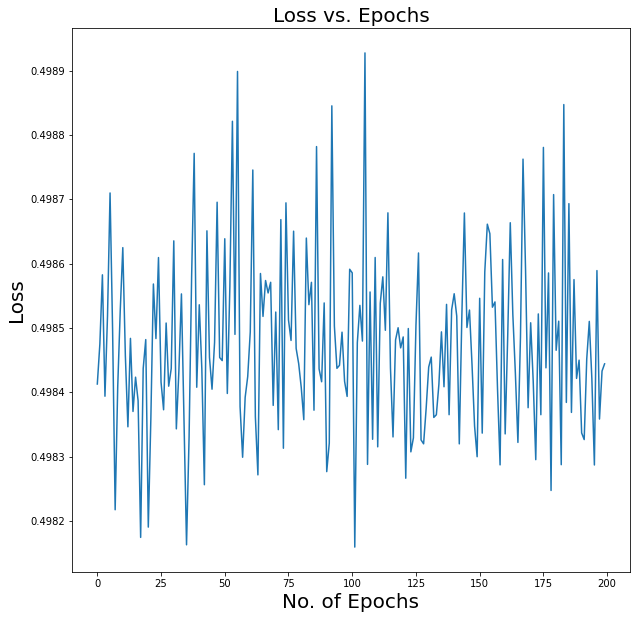

In [284]:
# A line plot showing the loss through iterations
plt.figure(figsize=(10,10))
x = list(range(epoch))
plt.plot(x, losses)
plt.xlabel('No. of Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.title("Loss vs. Epochs", size=20)
plt.show()

In [286]:
# make predictions for the initial dataset and create a final column for cosine similarity
pred_score = []
for i in range(len(df_rank)):
    embeddings = bert_model.encode(df_rank['job_title_cleaned'][i])
    embeddings_tensors = torch.from_numpy(embeddings).float()
    pred = round(rank_model.predict(embeddings_tensors).detach().numpy().sum(), 2)
    pred_score.append(pred)
    
df_rank['RankNet_score'] = pred_score
df_rank.sort_values(by='RankNet_score', ascending=False)

,id,job_title,location,connection,job_title_cleaned,similarity_tfidf1,glove_similarity,word2vec_similarity,bert_similarity,mean_similarity,starred_score,RankNet_score
52,53,Seeking Human Resources HRIS and Generalist Positions,Greater Philadelphia Area,500+,seeking human resource human resourcesis generalist position,0.279256,0.907779,0.760450,0.730324,0.669452,0.669452,1.0
38,39,Student at Humber College and Aspiring Human Resources Generalist,Kanada,61,student humber college aspiring human resource generalist,0.421753,0.835481,0.829068,0.760160,0.711616,0.711616,1.0
27,28,Seeking Human Resources Opportunities,"Chicago, Illinois",390,seeking human resource opportunity,0.257517,0.894528,0.756767,0.805926,0.678685,0.678685,1.0
28,29,Aspiring Human Resources Management student seeking an internship,"Houston, Texas Area",500+,aspiring human resource management student seeking internship,0.382047,0.881137,0.783973,0.716318,0.690869,0.690869,1.0
29,30,Seeking Human Resources Opportunities,"Chicago, Illinois",390,seeking human resource opportunity,0.257517,0.894528,0.756767,0.805926,0.678685,0.678685,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33,34,People Development Coordinator at Ryan,"Denton, Texas",500+,people development coordinator ryan,0.000000,0.684681,0.253594,0.378423,0.329174,0.329174,0.0
31,32,Native English Teacher at EPIK (English Program in Korea),Kanada,500+,native english teacher epik english program korea,0.000000,0.625937,0.240216,0.141922,0.252019,0.252019,0.0
22,23,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,advisory board member celal bayar university,0.000000,0.450873,0.206563,0.201885,0.214830,0.214830,0.0
21,22,People Development Coordinator at Ryan,"Denton, Texas",500+,people development coordinator ryan,0.000000,0.684681,0.253594,0.378423,0.329174,0.329174,0.0


## Conclusion

In this project, to find the ability to predict the candidates' fitness for the provided keywords (positions required), different Natural Language Processing techniques were implemented in order to calculate the similarities. A list of the different text pre-preprocessings techniques that were used:
* TF-IDF
* Word2Vec
* GloVe.
* BERT.

A mean similarity score was added to the data based on the mean of the cosine similarities of each one of those tehcniques. Then, Learning to Rank (LTR) is a deep learning technique that was applied to re-rank the candidates based